# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 9: *WatershedEdgeTransform*
Compute Watershed transform by considering the edge image
***  

### Setup modules

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

# Module functions
from ImageUtilities import imageReadL, plotImageL, createImageF, plotImageF
from ImageOperatorsUtilities import applyCannyEdgeDetector
from ImageRegionsUtilities import watherShed
from PrintUtilities import printProgress
 
# Math and iteration
from math import  sqrt
from timeit import itertools

### Parameters:
    pathToDir = Input image directory
    imageName = Input image name
    kernelSize = Gaussian and Sobel kernel size
    normalizeMagnitude = Normalise the convolution output
    upperT = upper threshold
    lowerT = lower threshold
    windowDelta = Size of window used in hysteresis
    suppWindow = Size of the window used to find maxima 

In [2]:
pathToDir = os.path.join(os.path.dirname("__file__"), "../../Images/Chapter9/Input/")
imageName = "Logs.png"
cannyKernelSize = 7
upperT = 0.5
lowerT = 0.1
windowDelta = 3
suppWindow = 5

FLT_MAX = sys.float_info.max

### Show input image

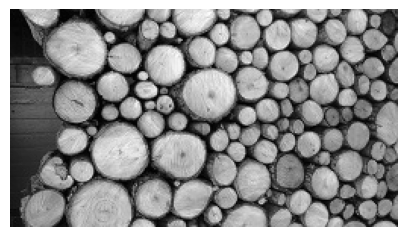

In [3]:
inputImage, width, height = imageReadL(pathToDir+imageName)
plotImageL(inputImage)

### Compute edges

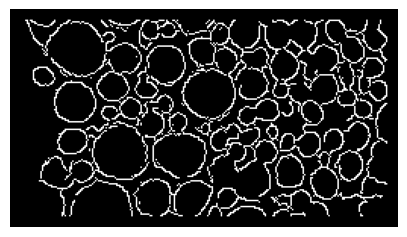

In [4]:
magnitude, angle = applyCannyEdgeDetector(inputImage, cannyKernelSize, cannyKernelSize, upperT, lowerT)
plotImageF(magnitude)         

### Compute distance image

0 / 256  .. 1 / 256  .. 2 / 256  .. 3 / 256  .. 4 / 256  .. 5 / 256  .. 6 / 256  .. 7 / 256  .. 8 / 256  .. 9 / 256  .. 10 / 256  .. 11 / 256  .. 12 / 256  .. 13 / 256  .. 14 / 256  .. 15 / 256  .. 16 / 256  .. 17 / 256  .. 18 / 256  .. 19 / 256  .. 20 / 256  .. 21 / 256  .. 22 / 256  .. 23 / 256  .. 24 / 256  .. 25 / 256  .. 26 / 256  .. 27 / 256  .. 28 / 256  .. 29 / 256  .. 30 / 256  .. 31 / 256  .. 32 / 256  .. 33 / 256  .. 34 / 256  .. 35 / 256  .. 36 / 256  .. 37 / 256  .. 38 / 256  .. 39 / 256  .. 40 / 256  .. 41 / 256  .. 42 / 256  .. 43 / 256  .. 44 / 256  .. 45 / 256  .. 46 / 256  .. 47 / 256  .. 48 / 256  .. 49 / 256  .. 50 / 256  .. 51 / 256  .. 52 / 256  .. 53 / 256  .. 54 / 256  .. 55 / 256  .. 56 / 256  .. 57 / 256  .. 58 / 256  .. 59 / 256  .. 60 / 256  .. 61 / 256  .. 62 / 256  .. 63 / 256  .. 64 / 256  .. 65 / 256  .. 66 / 256  .. 67 / 256  .. 68 / 256  .. 69 / 256  .. 70 / 256  .. 71 / 256  .. 72 / 256  .. 73 / 256  .. 74 / 256  .. 75 / 256  .. 76 / 256  .. 77 / 256 

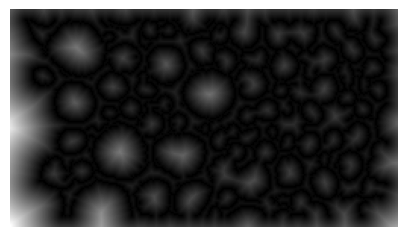

In [6]:
# Divide pixels into edge and region pixels
edgePixels = [ ]
shapeImage = [ ]
for x,y in itertools.product(range(0, width), range(0, height)):
    if magnitude[y,x] > 0:
        edgePixels.append((y,x))
    shapeImage.append((y,x))

# Radial is the minimal distance to the edge
distanceImage = createImageF(width, height)
numEdges = len(edgePixels)
for x in range(0, width):
    printProgress(x, width)
    for y in range(0, height):
        minEdgeDist = FLT_MAX
        for indexEdge in range(0, numEdges):
            edgeY, edgeX = (edgePixels[indexEdge])[0], (edgePixels[indexEdge])[1]
            minEdgeDist = min(minEdgeDist, sqrt((edgeX-x)**2+(edgeY-y)**2) )
        # We define an edge in a distance image as 1. In this case we do not have edges so all flood
        distanceImage[y,x] = minEdgeDist + 2.0
plotImageF(distanceImage)

### Watershed of the distance image

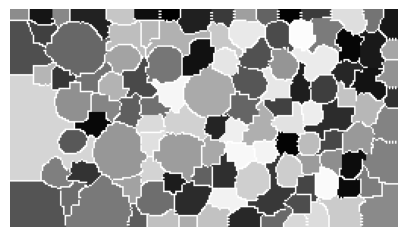

In [8]:
watershed = watherShed(distanceImage, shapeImage, suppWindow)
plotImageF(watershed)